In [1]:
import pandas as pd
prod_a = pd.read_csv('/Users/halston/Desktop/Python/Data visualization/Data_Set/prod_A.csv')
prod_b = pd.read_csv('/Users/halston/Desktop/Python/Data visualization/Data_Set/prod_B.csv')
users = pd.read_csv('/Users/halston/Desktop/Python/Data visualization/Data_Set/user_data.csv')

In [2]:
users[:2]

,user_id,country,age,gender,start_date
0,9541124,DK,22,male,2018-05-05
1,5946065,US,15,male,2018-01-24


In [3]:
from collections import Counter
countries = dict(Counter(users['country']))
countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1])}
countries

{'ES': 1388,
 'FI': 8579,
 'IT': 9324,
 'CZ': 14911,
 'DK': 16401,
 'FR': 16968,
 'UK': 19205,
 'DE': 24438,
 'NL': 33150,
 'PL': 35838,
 'US': 419798}

The most popular country according the given information is US.

In [4]:
genders = dict(Counter(users['gender']))
genders = {k: v for k, v in sorted(genders.items(), key=lambda item: item[1])}
genders

{'unknown': 39257, 'female': 157293, 'male': 403450}

Even if all the unknown users are female, there would still be more males than females.

In [5]:
import numpy as np
ages = np.array(users['age'], dtype=float)
round(ages.mean(), 0)

33.0

The average age of the user is 33 years.

In [6]:
start_dates = users['start_date'].values
mean = (np.array(start_dates, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

print(mean)

2018-06-27T05:40:54


Average date of joining
### Total average user:
Country US, Gender Male, Age 33, Registered on 27-06-2018

In [7]:
prod_a

,ds,userid
0,2020-01-01,3384044
1,2020-01-01,5543378
2,2020-01-01,5773857
3,2020-01-01,5526092
4,2020-01-01,6972245
...,...,...
678797,2020-09-10,7873089
678798,2020-09-10,7860477
678799,2020-09-10,9933348
678800,2020-09-10,4381661


In [8]:
a_users = list(set(prod_a['userid'].values))
a_users = dict(zip(a_users, [1] * len(a_users)))
b_users = list(set(prod_b['userid'].values))
b_users = dict(zip(b_users, [1] * len(b_users)))

In [9]:
users['a'] = users['user_id'].values
users['a'] = users['a'].map(a_users) 
users['a'] = users['a'].fillna(0).astype(int)
users['b'] = users['user_id'].values
users['b'] = users['b'].map(b_users) 
users['b'] = users['b'].fillna(0).astype(int)
users[:2]

,user_id,country,age,gender,start_date,a,b
0,9541124,DK,22,male,2018-05-05,0,1
1,5946065,US,15,male,2018-01-24,1,0


In [10]:
users.to_csv('prods_for_users.csv')

In [11]:
users_a = users[users['a'] == 1]
a_countries = dict(Counter(users_a['country']))
a_countries = {k: v for k, v in sorted(a_countries.items(), key=lambda item: item[1])}
a_country = list(a_countries.keys())[-1]
a_genders = dict(Counter(users_a['gender']))
a_genders = {k: v for k, v in sorted(a_genders.items(), key=lambda item: item[1])}
a_gender = list(a_genders.keys())[-1]
a_age = np.array(users_a['age'], dtype=float).mean()
a_date = (np.array(users_a['start_date'].values, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))
print('Average A user is {}, age of {}, country is {}, register on {}'.format(a_gender, round(a_age, 0), a_country, a_date))

Average A user is male, age of 38.0, country is US, register on 2018-06-27T07:01:53


So, the user of A product is older that average user, other things are almost the same.

In [12]:
users_b = users[users['b'] == 1]
b_countries = dict(Counter(users_b['country']))
b_countries = {k: v for k, v in sorted(b_countries.items(), key=lambda item: item[1])}
b_country = list(b_countries.keys())[-1]
b_genders = dict(Counter(users_b['gender']))
b_genders = {k: v for k, v in sorted(b_genders.items(), key=lambda item: item[1])}
b_gender = list(b_genders.keys())[-1]
b_age = np.array(users_b['age'], dtype=float).mean()
b_date = (np.array(users_b['start_date'].values, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))
print('Average B user is {}, age of {}, country is {}, register on {}'.format(b_gender, round(b_age, 0), b_country, 
                                                                              b_date))

Average B user is male, age of 35.0, country is US, register on 2018-06-26T21:55:30


In [13]:
inds = np.logical_and(np.array([users['a'] == 0]), np.array([users['b'] == 0]))[0]
users[inds]['age'].values.mean()

27.09455006202186

Check if user who haven't used both products indeed much younger than users.

In [14]:
prod_a['saled_item'] = [1] * len(prod_a)

In [15]:
prod_a

,ds,userid,saled_item
0,2020-01-01,3384044,1
1,2020-01-01,5543378,1
2,2020-01-01,5773857,1
3,2020-01-01,5526092,1
4,2020-01-01,6972245,1
...,...,...,...
678797,2020-09-10,7873089,1
678798,2020-09-10,7860477,1
678799,2020-09-10,9933348,1
678800,2020-09-10,4381661,1


In [16]:
a_prod_days = prod_a.groupby(['ds']).sum()

In [17]:
a_prod_days

,userid,saled_item
ds,,
2020-01-01,20781699487,3685
2020-01-02,13340625891,2383
2020-01-03,24495915086,4340
2020-01-04,25984339494,4637
2020-01-05,13507118215,2385
...,...,...
2020-09-06,20185589144,3638
2020-09-07,24074005162,4248
2020-09-08,12564529418,2221


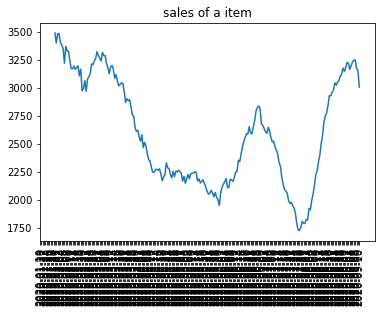

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a_prod_days.index, a_prod_days['saled_item'].rolling(30).mean())
plt.xticks(rotation=90)
plt.title('sales of a item')
plt.show()

According the plot there is no growth for product A

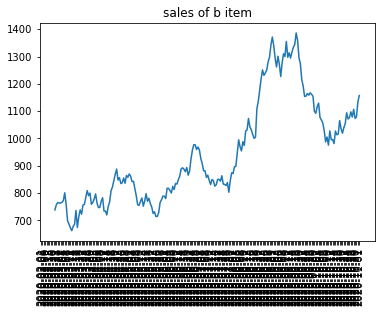

In [19]:
prod_b['saled_item'] = [1] * len(prod_b)
b_prod_days = prod_b.groupby(['ds']).sum()
plt.plot(b_prod_days.index, b_prod_days['saled_item'].rolling(30).mean())
plt.xticks(rotation=90)
plt.title('sales of b item')
plt.show()

There is a growth for the product B.

In [20]:
age_dict = dict(zip(users['user_id'], users['age']))
gender_dict = dict(zip(users['user_id'], users['gender']))

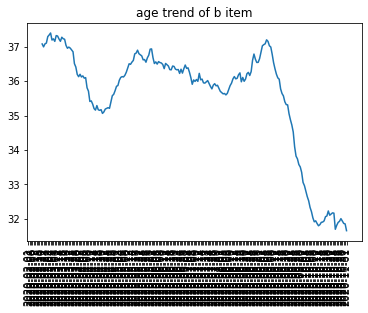

In [21]:
prod_b['saled_item'] = [1] * len(prod_b)
prod_b['age'] = prod_b['userid'].map(age_dict) 
b_prod_days = prod_b.groupby(['ds']).mean()
plt.plot(b_prod_days.index, b_prod_days['age'].rolling(30).mean())
plt.xticks(rotation=90)
plt.title('age trend of b item')
plt.show()

B item becoming more popular for younger people

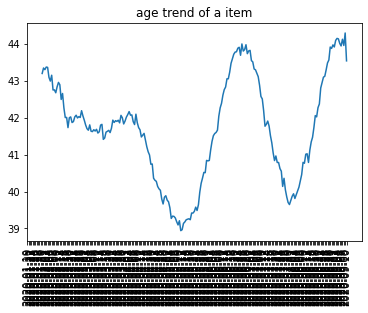

In [22]:
prod_a['saled_item'] = [1] * len(prod_a)
prod_a['age'] = prod_a['userid'].map(age_dict) 
a_prod_days = prod_a.groupby(['ds']).mean()
plt.plot(a_prod_days.index, a_prod_days['age'].rolling(30).mean())
plt.xticks(rotation=90)
plt.title('age trend of a item')
plt.show()

A item has almost the same age group of users

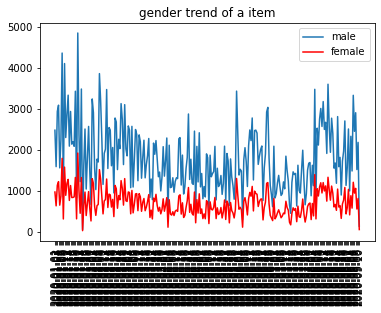

In [23]:
prod_a['saled_item'] = [1] * len(prod_a)
prod_a['gender'] = prod_a['userid'].map(gender_dict) 
prod_a['male'] = np.array([prod_a['gender'] == 'male'][0], dtype=int)
prod_a['female'] = np.array([prod_a['gender'] == 'female'][0], dtype=int)
a_prod_days = prod_a.groupby(['ds']).sum()
plt.plot(a_prod_days.index, a_prod_days['male'], label='male')
plt.plot(a_prod_days.index, a_prod_days['female'], color='red', label='female')
plt.xticks(rotation=90)
plt.title('gender trend of a item')
plt.legend()
plt.show()

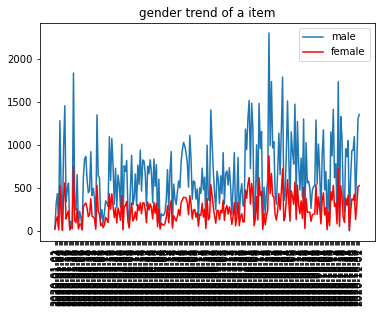

In [24]:
prod_b['saled_item'] = [1] * len(prod_b)
prod_b['gender'] = prod_b['userid'].map(gender_dict) 
prod_b['male'] = np.array([prod_b['gender'] == 'male'][0], dtype=int)
prod_b['female'] = np.array([prod_b['gender'] == 'female'][0], dtype=int)
b_prod_days = prod_b.groupby(['ds']).sum()
plt.plot(b_prod_days.index, b_prod_days['male'], label='male')
plt.plot(b_prod_days.index, b_prod_days['female'], color='red', label='female')
plt.xticks(rotation=90)
plt.title('gender trend of a item')
plt.legend()
plt.show()

I don't see any gender trends for both items, except the general trend that there are more male users.